In [2]:
%matplotlib inline

import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
from skimage import img_as_float
import os

In [3]:
# from google.colab import drive
# drive.mount('/content/drive/')

In [4]:
# os.chdir('./drive/My Drive')

In [5]:
# !ls

In [6]:
data = scipy.io.loadmat('facedata.mat')

people, image :  (40, 10)
image size : (56, 46)


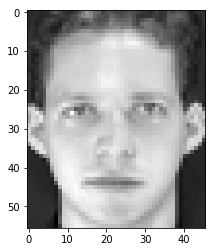

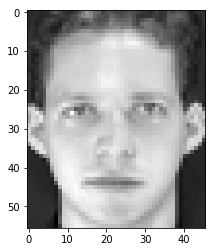

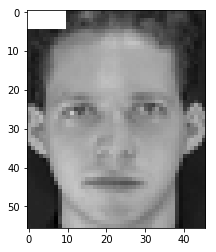

In [23]:
print('people, image : ', data['facedata'].shape)
print('image size :', data['facedata'][0, 0].shape)
plt.imshow(data['facedata'][0, 0], cmap='gray')
plt.show()

# print(data['facedata'][0,0])
xf = {}
xf[0, 0] = img_as_float(data['facedata'][0,0])
# print(xf[0, 0])
plt.imshow(xf[0,0], cmap='gray')
plt.show()

x_temp = xf[0, 0]
x_temp[0:5, 0:10] = 1
# In format, 1 is white
plt.imshow(x_temp, cmap='gray')
plt.show()

In [24]:
def euclidean_distance(img1, img2):
    flatten1 = img1.reshape(-1)
    flatten2 = img2.reshape(-1)
    return np.sum(((flatten1 - flatten2) ** 2), axis = 0)** 0.5

In [25]:
xf = dict()
for i in range(data['facedata'].shape[0]):
    for j in range(data['facedata'].shape[1]):
        xf[i, j] = img_as_float(data['facedata'][i, j])

# T5

In [26]:
print(euclidean_distance(xf[0,0], xf[1,0]))

8.173295099737281


# T6

In [27]:
T = list()
D = list()
for i in range(data['facedata'].shape[0]):
    for j in range(data['facedata'].shape[1]):
        if j <= 2:
            T.append(img_as_float(data['facedata'][i, j]))
        else:
            D.append(img_as_float(data['facedata'][i, j]))
T = np.array(T)
D = np.array(D)

In [28]:
print(T.shape)
print(D.shape)


(120, 56, 46)
(280, 56, 46)


In [29]:
similarity = list()
for i in range(len(T)):
    temp = list()
    for j in range(len(D)):
        temp.append(euclidean_distance(T[i], D[j]))
    similarity.append(temp)
similarity = np.array(similarity)

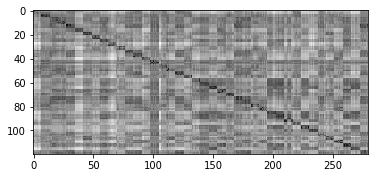

(120, 280)


In [30]:
plt.imshow(similarity, cmap='gray')
plt.show()
print(similarity.shape)

# T7

In [31]:
print(similarity.shape)

(120, 280)


# T8

In [32]:
def min_comparison(similarity):
  min_dist = list()
  for i in range(0,similarity.shape[0] // 3):
    temp = list()
    for j in range(similarity.shape[1]):
#       print(similarity[3*i:3*i+3,j])
      min_distance = np.min(similarity[3*i:3*i+3, j], axis = 0)
      temp.append(min_distance)
    min_dist.append(temp)
  return np.array(min_dist)

In [33]:
min_dist = min_comparison(similarity)

In [34]:
def confusion_matrix(similarity, thresh):
  true_positive = 0
  true_negative = 0
  false_positive = 0
  false_negative = 0
 
  for i in range(similarity.shape[0]):
    for j in range(similarity.shape[1]):
      if i == j // 7:
        if similarity[i, j] > thresh:
          false_negative += 1
        else:
          true_positive += 1
      else:
        if similarity[i, j] > thresh:
          true_negative += 1
        else:
          false_positive += 1
      
  return np.array([[true_positive, false_positive], [false_negative, true_negative]])
        
      

In [35]:
confusion_mat = confusion_matrix(min_dist, 10)
confusion_mat

array([[ 279, 4984],
       [   1, 5936]])

In [36]:
def calculate_TPR_FPR(confusion_matrix):
  true_positive = confusion_matrix[0, 0]
  false_positive = confusion_matrix[0, 1]
  false_negative = confusion_matrix[1, 0]
  true_negative = confusion_matrix[1, 1]
  if (true_positive + false_negative == 0 or false_positive + true_negative == 0):
    TPR = -1
    FPR = -1
  else:
    TPR = true_positive / (true_positive + false_negative)
    FPR = false_positive / (true_negative + false_positive)
#   print('true positive rate :', TPR)
#   print('false positive rate :', FPR)
  return (TPR, FPR)

In [37]:
calculate_TPR_FPR(confusion_mat)

(0.9964285714285714, 0.4564102564102564)

# T9 & T10


In [38]:
def evaluate_ROC(similarity, start_thresh, end_thresh, step_thresh):
  roc_x = list()
  roc_y = list()
  for thresh in np.arange(start_thresh, end_thresh, step_thresh):
    similar_confusion_mat = confusion_matrix(similarity, thresh)
    TPR, FPR = calculate_TPR_FPR(similar_confusion_mat)
    roc_x.append(FPR)
    roc_y.append(TPR)
  return (roc_x, roc_y)

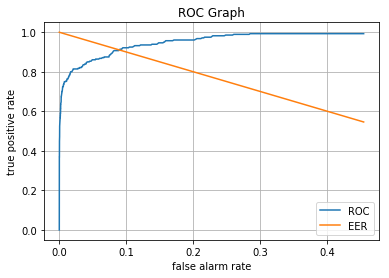

In [39]:
roc_x, roc_y = evaluate_ROC(min_dist, 0, 10, 0.01)
roc_x = np.array(roc_x)
roc_y = np.array(roc_y)
plt.grid(True)
plt.plot(roc_x, roc_y)
plt.plot(roc_x, 1-roc_x)
plt.title('ROC Graph')
plt.xlabel('false alarm rate')
plt.ylabel('true positive rate')
plt.legend(['ROC', 'EER'])
plt.show()

at recall 0.1%

In [40]:
FAR_index = np.max(np.where(roc_x < 0.0102),axis=1)
FAR_val = roc_y[FAR_index][0]
print('FAR at recall 0.1% :', FAR_val)

FAR at recall 0.1% : 0.7535714285714286


# T11

(56, 46)


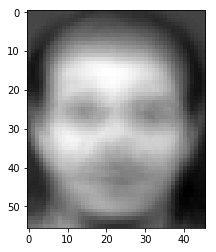

In [41]:
meanface = np.average(T, axis=0)
print(meanface.shape)
plt.imshow(meanface, cmap='gray')
plt.show()

# T12

In [42]:
# size of covariance matrix is 2576x2576
# rank of covariance matrix is 119
X_hat = T - meanface
X_hat = X_hat.reshape(120, -1).T
cov_mat = X_hat.dot(X_hat.T)
print(cov_mat.shape)
print(np.linalg.matrix_rank(cov_mat))

(2576, 2576)
119


# T13

In [43]:
# size of Gram matrix is 120x120
# rank of Gram matrix is 119
gram_mat = X_hat.T.dot(X_hat)
print(gram_mat.shape)
print(np.linalg.matrix_rank(gram_mat))

(120, 120)
119


# T14

In [44]:
if (np.array_equal(gram_mat,gram_mat.T)):
  print('symmetric')
  print('count the number of nonzero eigen values : ', np.count_nonzero(np.linalg.eigh(gram_mat)[0]))
else:
  print('non-symmetric')
  print('count the number of nonzero eigen values : ', np.count_nonzero(np.linalg.eig(gram_mat)))
  

symmetric
count the number of nonzero eigen values :  120


# T15

In [45]:
gram_eig_vals, gram_eig_vecs = np.linalg.eigh(gram_mat)

In [46]:
gram_eig_vals = np.where(abs(gram_eig_vals) < 1e-5, 0, gram_eig_vals)

In [47]:
gram_eig_vals = gram_eig_vals[::-1]
gram_eig_vecs = gram_eig_vecs[:, ::-1]
print(gram_eig_vals)

[1.42392971e+03 8.75375177e+02 5.58624400e+02 4.07347157e+02
 3.71021274e+02 2.63280801e+02 2.03396990e+02 1.90965101e+02
 1.66548056e+02 1.43570551e+02 1.22951200e+02 1.04788229e+02
 9.36606993e+01 8.52020934e+01 8.00790884e+01 7.22926270e+01
 6.92896016e+01 6.55557914e+01 6.16791259e+01 5.90743553e+01
 5.42659430e+01 5.19180210e+01 4.60439029e+01 4.49517564e+01
 4.38154370e+01 4.17882938e+01 4.04839086e+01 3.80160594e+01
 3.72939497e+01 3.42784031e+01 3.38082909e+01 3.24110643e+01
 3.01160763e+01 2.88090967e+01 2.76934934e+01 2.72362796e+01
 2.63193795e+01 2.55181270e+01 2.42531018e+01 2.33566654e+01
 2.24888684e+01 2.22128871e+01 2.13271981e+01 2.05964187e+01
 1.97567698e+01 1.91068901e+01 1.86898335e+01 1.81386227e+01
 1.79801629e+01 1.69617092e+01 1.63867949e+01 1.56952212e+01
 1.56409226e+01 1.50995911e+01 1.45534702e+01 1.38473352e+01
 1.37682769e+01 1.35139271e+01 1.31342609e+01 1.26436508e+01
 1.25449028e+01 1.22504780e+01 1.19612169e+01 1.17761188e+01
 1.13660679e+01 1.110350

In [48]:
print('count the number of non-zero eigenvalues : ', np.count_nonzero(gram_eig_vals))

count the number of non-zero eigenvalues :  119


# T16

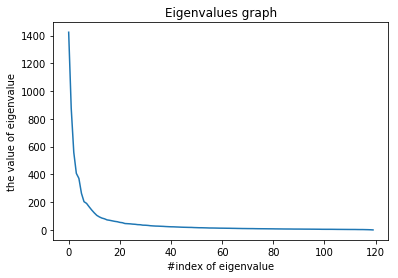

In [49]:
plt.title('Eigenvalues graph')
plt.xlabel('#index of eigenvalue')
plt.ylabel('the value of eigenvalue')
plt.plot(gram_eig_vals)
plt.show()

In [50]:
# eigenvalue is variance of eigenvector , we want to keep 95% data -> how many eigenvectors should I use?

# T17

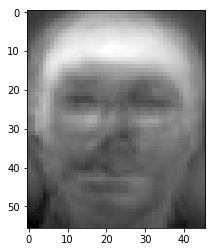

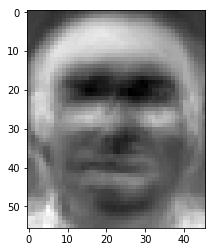

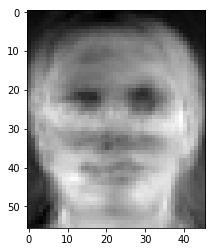

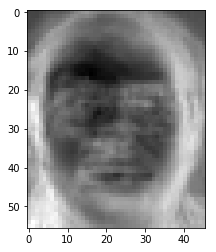

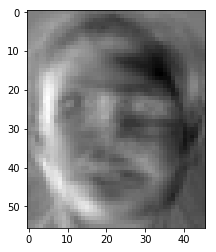

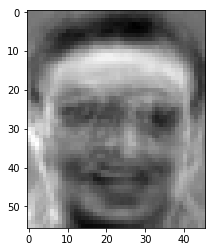

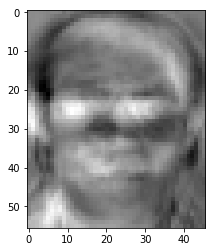

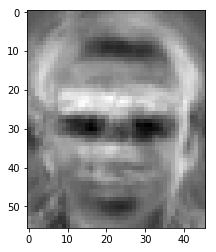

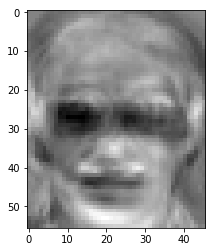

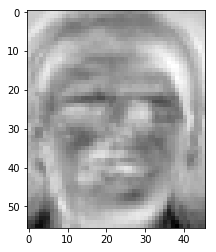

In [51]:
num_eig = 10

gram_eig_val, gram_eig_vec = np.linalg.eigh(gram_mat)

gram_eig_val = np.where(abs(gram_eig_val) < 1e-5, 0, gram_eig_val)
gram_eig_val = gram_eig_val[::-1]
gram_eig_vec = gram_eig_vec[:, ::-1]

for k in range(num_eig):
    
  # normalize
  gram_vec = gram_eig_vec[:, k] / np.linalg.norm(gram_eig_vec[:, k], axis = 0)
  
  img = X_hat.dot(gram_vec)
   
  # renormalize 
  img = img / np.linalg.norm(img, axis = 0, ord=2)

  img = img.reshape(56, 46)
  

  plt.imshow(img, cmap='gray')
  plt.show()


# T18

white part is important part on images but black is not

The big variance is proprtional to the high eigenvalue. Therefore, The biggest variance are capture in the two eigenvector

# T19

In [52]:
def projection_value(img, k = 10):
  eig_val_gram, eig_vec_gram = np.linalg.eigh(gram_mat)
  eig_val_gram = eig_val_gram[::-1]
  eig_vec_gram = eig_vec_gram[:, ::-1]
  
  eig_vec_gram2cov = X_hat.dot(eig_vec_gram)

  # normalize 
  for j in range(eig_vec_gram2cov.shape[1]):
    eig_vec_gram2cov[:, j] = eig_vec_gram2cov[:, j] / np.linalg.norm(eig_vec_gram2cov[:, j], axis=0)
  
  projection_gram = eig_vec_gram2cov[:, :k].T.dot((img - meanface).reshape(-1, 1))
 
  return projection_gram.reshape(-1)


In [53]:
projected_T = list()
for i in range(120):
  projected_T.append(projection_value(T[i]))
projected_T = np.array(projected_T)

projected_D = list()
for i in range(280):
  projected_D.append(projection_value(D[i]))
projected_D = np.array(projected_D)

In [54]:
projected_similarity = list()
for i in range(len(T)):
    temp = list()
    for j in range(len(D)):
        calculated = (np.sum((projected_T[i] - projected_D[j]) ** 2) ** 0.5)
        temp.append(calculated)
    projected_similarity.append(temp)
projected_similarity = np.array(projected_similarity)

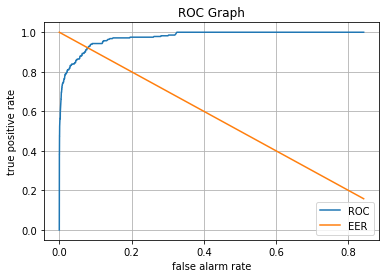

In [55]:
# projected_confusion_mat = confusion_matrix(projected_similarity)

projected_roc_x, projected_roc_y = evaluate_ROC(min_comparison(projected_similarity), 0, 10, 0.01)

projected_roc_x = np.array(projected_roc_x)
projected_roc_y = np.array(projected_roc_y)


plt.grid(True)
plt.plot(projected_roc_x, projected_roc_y)
plt.plot(projected_roc_x, 1 - projected_roc_x)
plt.title('ROC Graph')
plt.xlabel('false alarm rate')
plt.ylabel('true positive rate')
plt.legend(['ROC', 'EER'])
plt.show()

at 0.1% recall 

In [56]:
FAR_index = np.max(np.where(projected_roc_x < 0.011),axis=1)
FAR_val = projected_roc_y[FAR_index][0]
print('FAR at recall 0.1% :', FAR_val)

FAR at recall 0.1% : 0.7464285714285714


# T20

In [ ]:
for k in range(5, 15):
  projected_T = list()
  for i in range(120):
    projected_T.append(projection_value(T[i], k=k))
  projected_T = np.array(projected_T)

  projected_D = list()
  for i in range(280):
    projected_D.append(projection_value(D[i], k=k))
  projected_D = np.array(projected_D)
  projected_similarity = list()
  for i in range(len(T)):
      temp = list()
      for j in range(len(D)):
          calculated = (np.sum((projected_T[i] - projected_D[j]) ** 2) ** 0.5)
          temp.append(calculated)
      projected_similarity.append(temp)
      
  projected_similarity = np.array(projected_similarity)
  projected_roc_x, projected_roc_y = evaluate_ROC(min_comparison(projected_similarity), 0, 10, 0.01)

  projected_roc_x = np.array(projected_roc_x)
  projected_roc_y = np.array(projected_roc_y)

  plt.grid(True)
  plt.plot(projected_roc_x, projected_roc_y, label='ROC-k:' + str(k))
plt.plot(projected_roc_x, 1 - projected_roc_x)
plt.title('ROC Graph')  
plt.xlabel('false alarm rate')
plt.ylabel('true positive rate')
plt.legend()
plt.show()

Accordingly, the best k is 9

# OT1

In [ ]:
def mse_error(img1, img2):
  flatten1 = img1.reshape(-1)
  flatten2 = img2.reshape(-1)
  mse = 0
  if len(img1) != len(img2):
    return 
  else:
    mse += np.sum(np.square(flatten1 - flatten2), axis=0)
    mse /= len(flatten1)
    return mse

In [ ]:
# Reconstruction

# hyperparameter
k = 1
num_image = 0

def reconstruction(img, k = 10):
  eig_val_gram, eig_vec_gram = np.linalg.eigh(gram_mat)
  eig_val_gram = eig_val_gram[::-1]
  eig_vec_gram = eig_vec_gram[:, ::-1]
  
  eig_vec_gram2cov = X_hat.dot(eig_vec_gram)

  # normalize 
  for j in range(eig_vec_gram2cov.shape[1]):
    eig_vec_gram2cov[:, j] = eig_vec_gram2cov[:, j] / np.linalg.norm(eig_vec_gram2cov[:, j], axis=0)
  
  projection_gram = eig_vec_gram2cov[:, :k].T.dot((img - meanface).reshape(-1, 1))
  
  reconstructed_img = eig_vec_gram2cov[:, :k].dot(projection_gram)

  reconstructed_img = reconstructed_img.reshape(56, 46) + meanface
  return reconstructed_img

reconstructed_img = reconstruction(T[0])

plt.title('Reconstruction')
plt.imshow(reconstructed_img, cmap='gray')
plt.show()

plt.title('Original')
plt.imshow(T[0], cmap='gray')
plt.show()


print('MSE (k=10) : ', mse_error(T[0], reconstructed_img))


# OT2

In [ ]:
mse_list = []
base = np.arange(1, 120)
for i in range(1, 120):
  reconstructed_img = reconstruction(T[0], k = i)
  mse_list.append(mse_error(T[0], reconstructed_img))

plt.title('MSE')  
plt.xlabel('index of k')
plt.ylabel('the value of mse')
plt.plot(base, mse_list)
plt.show()

# OT3

There are 10 eigenfaces.It means we will store 10x56x46x32 bit = 80x2576 bytes = 206080 bytes, There are 1,000,000 images and each images will contain 10 projection values.Thus, we will use 206,080 + 40,000,000 = 40,206,080 btyes.after that,There are a mean face.It will be stored as 2576x4 btyes. In summary,we will have to consume memory in database is 40,216,384 btyes

# T21

PCA we need to do full rank Sw has N - C eigenvalues = 120 - 40 = 80 eigenvalues.Therefore,PCA need to have 80 dimensions

# T22

In [ ]:
num_classes = 120
num_samples = 40
mean_each_face = list()
for i in range(T.shape[0] // 3):
    mean_each_face.append(np.average(T[3*i:3*i+3], axis = 0))
mean_each_face = np.array(mean_each_face)

In [ ]:
SB = list()
for i in range(num_classes):
    SB.append((mean_each_face[i] - meanface).dot((mean_each_face[i] - meanface).T))

In [ ]:
SW = list()
for i in range(num_classes):
    temp = list()
    for j in range(num_samples):
        
        